In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Making the data easier to load 

data = pd.read_csv('/kaggle/input/titanic/train.csv') 

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#EDA(Exploratory data analysis)

#1 What is the total dimensions of the dataset (rows and columns)
numCols, numRows = data.shape
print('Number of rows:', numRows)
print('Number of columns', numCols)

Number of rows: 12
Number of columns 891


In [21]:
#2 How many missing values are in each column 
missingValues = data.isnull().sum()
print('Missing Values:')
print(missingValues)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
#Data Cleaning 

from sklearn.impute import SimpleImputer 

#Age is continous so average 
ageImputer = SimpleImputer(strategy='mean')
data['Age'] = ageImputer.fit_transform(data[['Age']])

#Cabin and embarked are catagorical so mode instead of mean 
cabinImputer = SimpleImputer(strategy='most_frequent')
data['Cabin'] = cabinImputer.fit_transform(data[['Cabin']])

embarkedImputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = cabinImputer.fit_transform(data[['Embarked']])

missingValues = data.isnull().sum()
print("Missing values:")
print(missingValues)

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [23]:
#3 Comparing the distribution of passenger classes

passengerClass = data['Pclass'].value_counts()
print("Passenger class distribution:")
print(passengerClass)

Passenger class distribution:
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [24]:
#4 Seeing what passengers left from each port

embarkedCounts = data['Embarked'].value_counts()
print("Passengers embarked from each port:")
print(embarkedCounts)

Passengers embarked from each port:
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [25]:
#5 Seeing which passengers survived 

survivedCount = data['Survived'].sum()
print("Num of passengers who survived:", survivedCount)

Num of passengers who survived: 342


In [26]:
#6 Determining the survival rate of passengers 

survivalRate = data['Survived'].mean() * 100
print("Survival rate:", format(survivalRate))

Survival rate: 38.38383838383838


Now I will begin the Data Visualization 

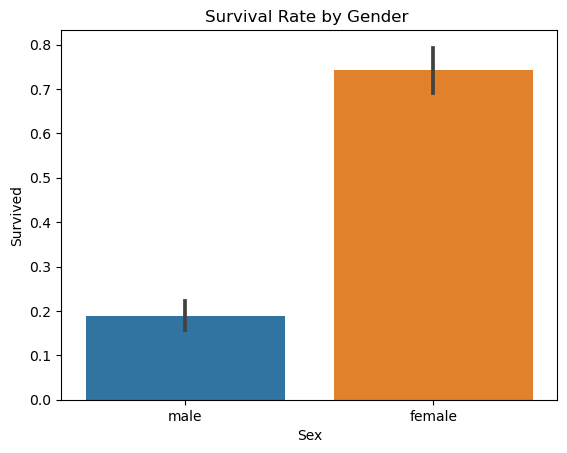

In [27]:
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sea 

#Survival rate by gender 

sea.barplot(x="Sex", y="Survived", data=data)
plt.title("Survival Rate by Gender ")
plt.show()

Based on the plot, we can infer that the survival rate for females is much higher, approximately 3.5 times the amount when compared to the males 

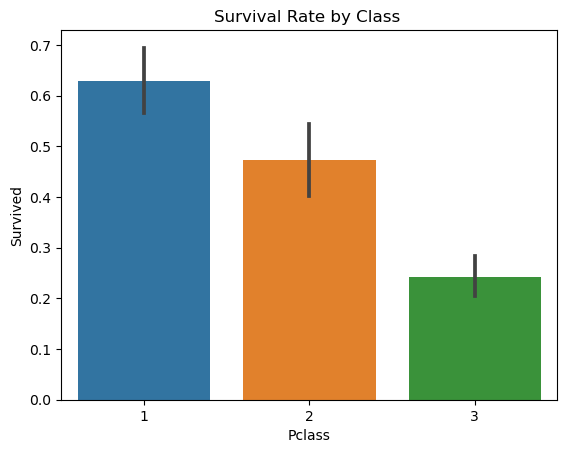

In [28]:
#Survival rate by passenger class
sea.barplot(x="Pclass" , y="Survived" , data=data)
plt.title("Survival Rate by Class ")
plt.show()

Based on the plot we can infer that the survival rate for the 1st class is higher than the 2nd class, and the 2nd class survival rate is higher than the 3rd class members 

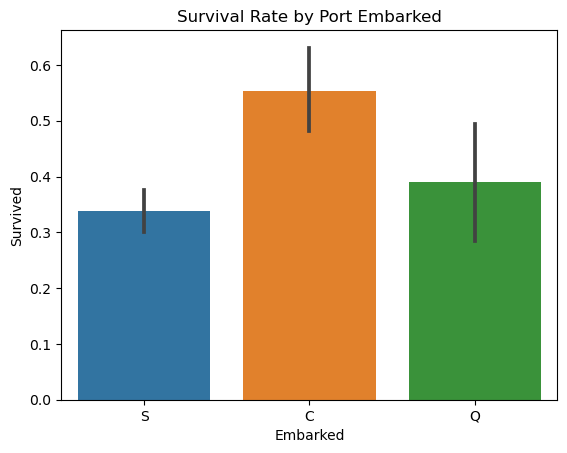

In [29]:
#3 Survival rate based on port departure 

sea.barplot(x="Embarked", y="Survived", data=data)
plt.title("Survival Rate by Port Embarked")
plt.show()

The people from port C survived the most, maybe there is some correlation between the class and the port embarked from?

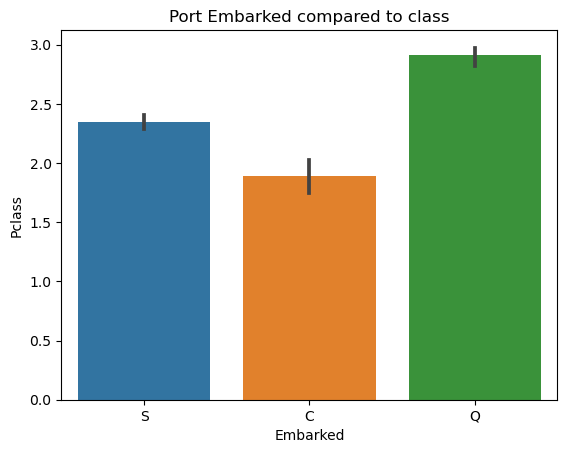

In [30]:
#4 Port Embarked compared to the class 
sea.barplot(x="Embarked", y="Pclass", data=data)
plt.title("Port Embarked compared to class")
plt.show()

When comparing the graphs, you can see that the class average for port q was 3, which conflicts with the survival rate of the port q. 

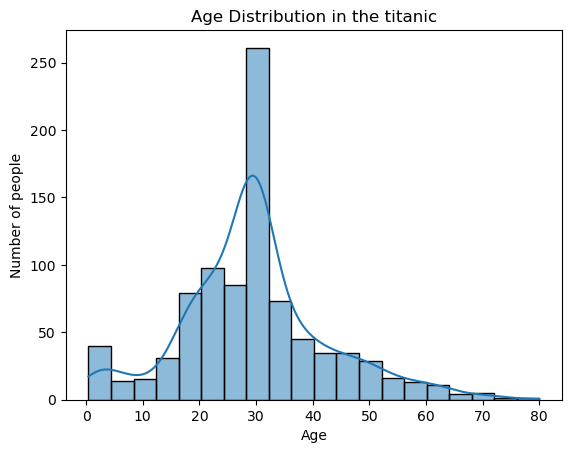

In [31]:
#Age distribution plotting 
sea.histplot(data["Age"], bins=20, kde=True)
plt.title("Age Distribution in the titanic")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

The age group with the largest Age Distribution in the titanic is 30 year olds, and the group with the least is 70 to 80 year olds. It would make more sense to get a better picture if we make age groups, to see the survival rate.   

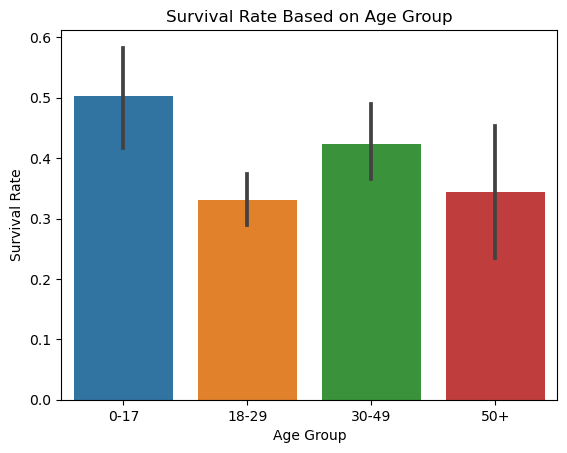

In [32]:
#Age groups to get a better picture 
data['AgeGroup'] = pd.cut(data['Age'], bins =[0,18,30,50, data['Age'].max()], labels=['0-17', '18-29', '30-49', '50+'])

#Plot of the age groups
sea.barplot(x="AgeGroup", y="Survived", data=data)
plt.title("Survival Rate Based on Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

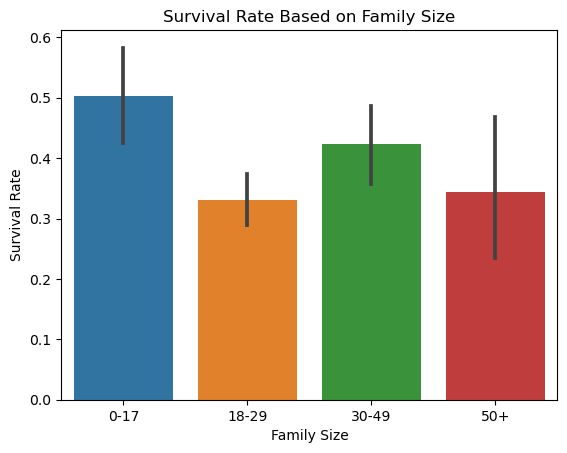

In [33]:
#Family Size survival Rate 
data['FamilySize'] = data['SibSp'] + data["Parch"] + 1

#Plot of the family size in relation to the survival rate 
sea.barplot(x="AgeGroup", y="Survived", data=data)
plt.title("Survival Rate Based on Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()